<img src="https://www.simplilearn.com/ice9/team_images/author_simplilearn.jpg">

#### DESCRIPTION

**Reduce the time a Mercedes-Benz spends on the test bench.**

***Problem Statement Scenario:***
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

1. If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
2. Check for null and unique values for test and train sets.
3. Apply label encoder.
4. Perform dimensionality reduction.
5. Predict your test_df values using XGBoost.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

palette = sns.color_palette()

sns.set()

### Import Dataset

In [2]:
df = pd.read_csv('MercDataSet/train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [4]:
df.shape

(4209, 378)

In [5]:
df.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


### EDA

In [7]:
y = df['y'].values

Text(0.5, 0, 'time (seconds)')

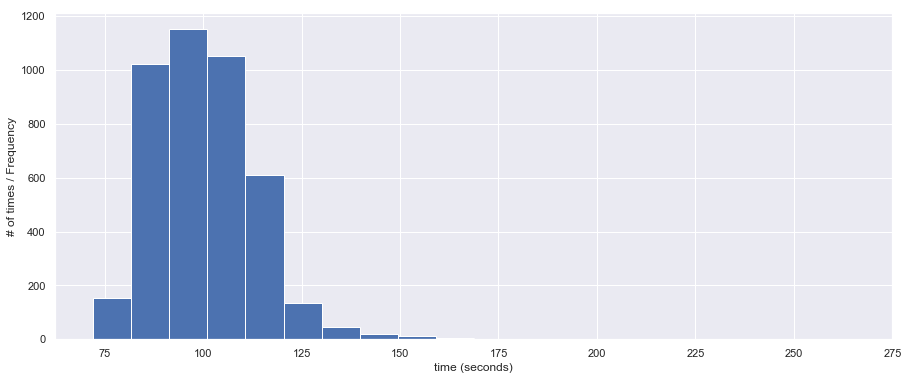

In [8]:
plt.figure(figsize=(15,6))

plt.hist(y, bins=20)

plt.ylabel('# of times / Frequency')
plt.xlabel('time (seconds)')

#### Observations:

1. y is normally distributed.


2. It is centered around mean.


3. At least 1 outlier near 250-275.

#### Checking if the things are changing over time

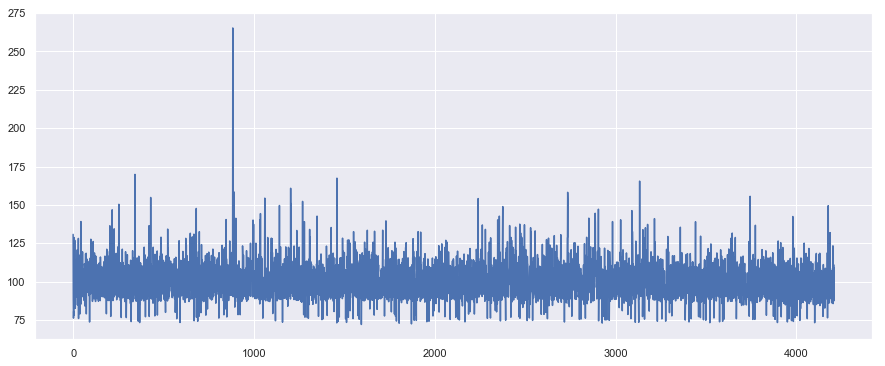

In [9]:
plt.figure(figsize=(15,6))
plt.plot(y)

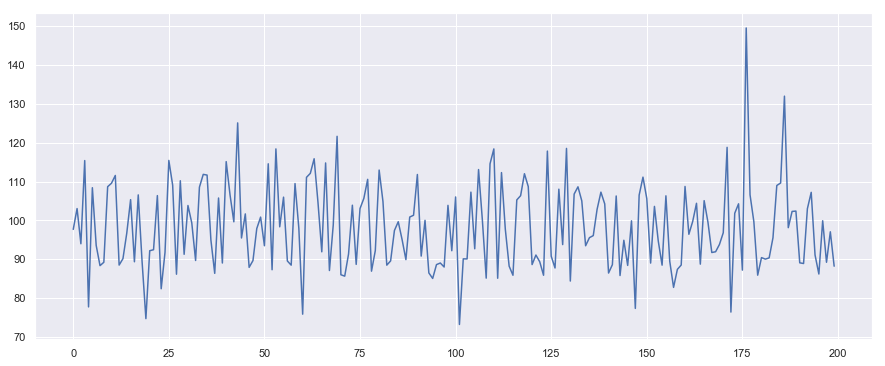

In [10]:
plt.figure(figsize=(15,6))
plt.plot(y[4000:4200])

#### Observations:

1. Data is stationary as there is no trend.


2. y series is not displaying any seasonality, and cyclicity.

### Perform feature analysis

In [11]:
cols = [c for c in df.columns if 'X' in c]

print(f'Number of features: {len(cols)}')

print('Feature Types')

df[cols].dtypes.value_counts()

Number of features: 376
Feature Types


int64     368
object      8
dtype: int64

#### Find cardinality of dataset

In [12]:
counts = [[],[],[]]

for c in cols:
    
    typ = df[c].dtype
    
    uniqval = len(np.unique(df[c]))
    
    if uniqval==1: counts[0].append(c)
    elif uniqval==2 and typ==np.int64: counts[1].append(c)
    else: counts[2].append(c)
        
print('Constant Features : {} \nBinary Features : {} \nCategorical Features : {}\n\n'.format(*[len(c) for c in counts]))

print(f'Constant Features :{counts[0]}')
print(f'\nBinary Features :{counts[1]}')
print(f'\nCategorical Features :{counts[2]}')

Constant Features : 12 
Binary Features : 356 
Categorical Features : 8


Constant Features :['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']

Binary Features :['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125',

#### Preprocessing

dft = pd.read_csv('MercDataSet/test.csv')

usable_col = list(set(df.columns)-set(['ID','y']))

X_train = df[usable_col]
X_test = dft[usable_col]

y_train = df['y'].values
id_test = df['ID'].values

for col in usable_col:
    cardinality = len(np.unique(X_train[col]))
    
    if cardinality == 1:
        X_train.drop(col,axis=1)
        X_test.drop(col,axis=1)
        
    if cardinality > 2:
        mapper = lambda x: sum([ord(digit) for digit in x])
        
        X_train[col] = X_train[col].apply(mapper)
        X_test[col] = X_test[col].apply(mapper)

In [13]:
dft = pd.read_csv('MercDataSet/test.csv')

usable_col = list(set(df.columns)-set(['ID','y']))

X_train = df[usable_col]
X_test = dft[usable_col]

y_train = df['y'].values
id_test = df['ID'].values

for col in usable_col:
    cardinality = len(np.unique(X_train[col]))
    
    if cardinality == 1:
        X_train.drop(col,axis=1)
        X_test.drop(col,axis=1)
        
    if cardinality > 2:
        mapper = lambda x: sum([ord(digit) for digit in x])
        
        X_train[col] = X_train[col].apply(mapper)
        X_test[col] = X_test[col].apply(mapper)

C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10,random_state=42)

pca_results_train = pca.fit_transform(X_train)#,axis=1)
pca_results_test = pca.fit_transform(X_test)

In [28]:
pca_results_train.shape

(3367, 10)

In [29]:
print(type(pca_results_train))
print(type(X_train))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [30]:
for i in range(1,11):
    X_train['pca_'+str(i)] = pca_results_train[:,i-1]
    X_test['pca_'+str(i)] = pca_results_test[:,i-1]

In [31]:
df[counts[2]].head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


In [32]:
X_train[counts[2]].head()

,X0,X1,X2,X3,X4,X5,X6,X8
1006,109,118,212,99,100,200,107,120
1840,110,115,212,100,100,198,103,115
3792,102,99,109,99,100,118,105,101
152,106,194,103,100,100,105,105,101
1557,218,105,212,99,100,197,108,107


## HW - drop all the columns starting w X and just retain ones with pca_, then run and submit

#### Modeling w XGBoost

In [33]:
!pip install XGBoost

In [34]:
import xgboost as xgb

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train,
                                                      y_train,
                                                      test_size=0.2,
                                                      random_state=42)

d_train = xgb.DMatrix(X_train,label=y_train)
d_valid = xgb.DMatrix(X_valid, label=y_valid)
d_test = xgb.DMatrix(X_test)

params = {}

params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

def xgb_r2score(preds,dtrain):
    labels = dtrain.get_label()
    return 'r2',r2_score(labels,preds)

watchlist = [(d_train,'train'),(d_valid,'valid')]

clf = xgb.train(params,
                d_train,
                1000,
                watchlist,
                early_stopping_rounds=50,
                feval=xgb_r2score,
                maximize=True,
                verbose_eval=10)

[11:12:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:99.1269	valid-rmse:98.4227	train-r2:-58.3331	valid-r2:-64.7807
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:81.1825	valid-rmse:80.4179	train-r2:-38.7959	valid-r2:-42.915
[20]	train-rmse:66.55	valid-rmse:65.7247	train-r2:-25.7429	valid-r2:-28.3336
[30]	train-rmse:54.6318	valid-rmse:53.7436	train-r2:-17.0221	valid-r2:-18.6138
[40]	train-rmse:44.9411	valid-rmse:43.9871	train-r2:-11.1955	valid-r2:-12.1389
[50]	train-rmse:37.081	valid-rmse:36.0582	train-r2:-7.30265	valid-r2:-7.82909
[60]	train-rmse:30.7276	valid-rmse:29.6329	train-r2:-4.70124	valid-r2:-4.96288
[70]	train-rmse:25.616	valid-rmse:24.4409	train-r2:-2.9622	valid-r2:-3.05641
[80]	train-rmse:21.5289	valid-rmse:20.2666	train-r2:-1.79871	valid-r2:

#### Predictions

In [35]:
p_test = clf.predict(d_test)

pred = pd.DataFrame()

pred['ID'] = id_test

pred['y'] = p_test

In [36]:
pred.head(10)

,ID,y
0,0,79.148605
1,6,102.039459
2,7,80.784302
3,9,78.045944
4,13,109.072739
5,18,93.369095
6,24,110.734787
7,25,94.151794
8,27,115.098373
9,30,93.978439


# Great Job !